In [53]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Lab-7 : Predict target X1 Using Multiple Linear Regression
 Preprocess the dataset:
* Handle missing values.
* Encode categorical variables.
* Normalize the data using Z-score or Min-Max normalization.

In [23]:
train=pd.read_csv('C:\\Users\\sapna\\Downloads\\GBCU\\dataset\\train.csv')

In [24]:
display(train) # display columns of train and test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
### Task 1: Preprocessing the Dataset ###
def preprocess_data(df):
    
    # Handling missing values for numeric columns only
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # Handling categorical variables
    categorical_columns = df.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        # One-Hot Encoding
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
    # Feature scaling (Z-score normalization)
    df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()
    
    return df


In [26]:
train = preprocess_data(train)

## Correlation between target variable(SalePrice) and the others

In [27]:
# Select only numeric columns
numeric_data = train.select_dtypes(include=[np.number])

# Compute the correlation and sort by 'SalePrice'
top_correlations = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

print(top_correlations)


SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 247, dtype: float64


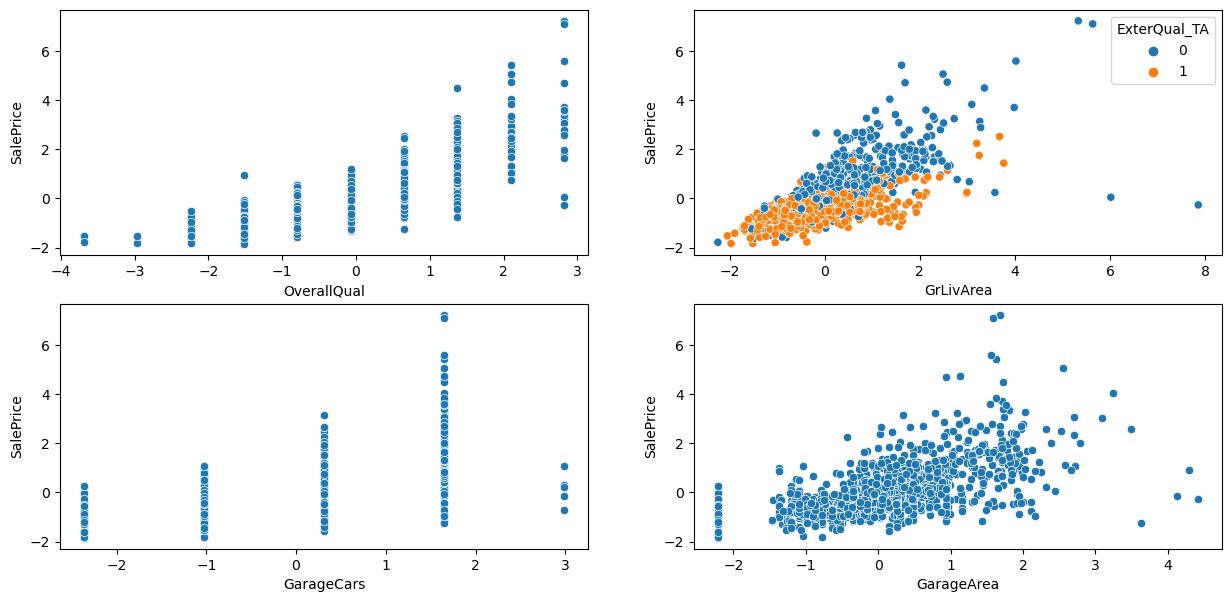

In [29]:
fig=plt.figure(figsize=(15,7))

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

sns.scatterplot(x=train['OverallQual'], y=train['SalePrice'], ax=ax1)
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'], hue=train['ExterQual_TA'],ax=ax2)
sns.scatterplot(x=train['GarageCars'], y=train['SalePrice'], ax=ax3)
sns.scatterplot(x=train['GarageArea'], y=train['SalePrice'], ax=ax4)

plt.show()

In [30]:
train=train.loc[(train['SalePrice']>300000) | (train['GrLivArea']<4000)] # outlier delete

# Task 2: Linear Regression
For the next task we will be using Multiple Linear Regression to solve the problem:
* Gradient Descent or Stochastic Gradient Descent (with batch size of 1)
* AdaGrad Method
* Newton Method


In [32]:
# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        gradient = (X.T @ (X @ theta - y)) / m
        theta -= learning_rate * gradient
    return theta

In [33]:
# AdaGrad Implementation
def adagrad(X, y, learning_rate=0.01, iterations=1000, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    G = np.zeros(n)
    for _ in range(iterations):
        gradient = (X.T @ (X @ theta - y)) / m
        G += gradient ** 2
        theta -= (learning_rate / (np.sqrt(G + epsilon))) * gradient
    return theta

In [34]:
def newton_method(X, y, epochs=10, tol=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        # Compute Gradient and Hessian
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        hessian = (1/m) * X.T.dot(X)
        
        # Update theta using Newton's update rule
        theta_update = np.linalg.pinv(hessian).dot(gradient)
        theta -= theta_update
        
        # Check for convergence
        if np.linalg.norm(theta_update) < tol:
            print("Converged!")
            break
            
    return theta

In [55]:
def stochastic_gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(iterations):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)  # Ensure xi is 2D
            yi = y[i]
            prediction = xi @ theta
            gradient = xi.T @ (prediction - yi)
            theta -= learning_rate * gradient
    return theta


# To calculate MSE

In [35]:
###  MSE Calculation ###
def mean_squared_error(X, y, theta):
    predictions = X @ theta
    return np.mean((predictions - y) ** 2)


In [43]:
X=train.drop(['Id','SalePrice'],axis=1)
y=train['SalePrice']
X = pd.get_dummies(X, drop_first=True)

In [54]:
if X.isnull().any().any():
    X.fillna(X.mean(), inplace=True)  # Filling NaNs with mean

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)    

In [50]:
# Gradient Descent
theta_gd = gradient_descent(X, y)
mse_gd = mean_squared_error(X, y, theta_gd)
print(f"MSE (Gradient Descent): {mse_gd}")

# AdaGrad
theta_adagrad = adagrad(X, y)
mse_adagrad = mean_squared_error(X, y, theta_adagrad)
print(f"MSE (AdaGrad): {mse_adagrad}")

# Newton's Method
theta_newton = newton_method(X, y)
mse_newton = mean_squared_error(X, y, theta_newton)
print(f"MSE (Newton's Method): {mse_newton}")




MSE (Gradient Descent): 0.13465147271216252
MSE (AdaGrad): 0.09953601135962947
Converged!
MSE (Newton's Method): 0.07438540768875407
